In [15]:
import pandas as pd
from ipynb.fs.full.utils import get_df, rename_values, format_wordcloud_text
from ipynb.fs.full.plots import single_barplot, wordcloud

In [16]:
# get formatted and ready to use dataframe
df = get_df()

In [17]:
df.head(10)

,ID,Status,Duration,D1_Undergraduation,D1_Specialization,D1_Master,D1_Phd,D1_Courses,D1_Others,D2_Country,...,Q15_Model_Deploy_Production_Monitoring,Q16_Model_Monitor_Aspects_Input_And_Output,Q16_Model_Monitor_Aspects_Interpretability_Output,Q16_Model_Monitor_Aspects_Output_And_Decisions,Q16_Model_Monitor_Aspects_Fairness,Q16_Model_Monitor_Aspects_Others,Q16_Model_Monitor_Aspects_Others_Free,Q17_Automated_Machine_Learning_Tools_Yes_No,Q17_Automated_Machine_Learning_Tools_Yes_Free,Origin
2,31,Completed (31),1317,Economics,-99,M.Sc. in Economics,-99,Data Scientist in Datacamp,-99,Brazil,...,-77,not quoted,not quoted,not quoted,not quoted,not quoted,-99,0,-99,https://ww2.unipark.de/uc/seml/
3,34,Completed (31),854,-99,Management,No,No,No,No,Brazil,...,70,not quoted,not quoted,quoted,not quoted,not quoted,-99,No,-99,-99
4,36,Completed (31),1593,Mathematics,Informatics,MSC Computer Science,PhD computer Science,Vários cursos in Coursera,-99,Brazil,...,60,quoted,not quoted,quoted,not quoted,not quoted,-99,"Yes, Please, specify",Own approach,-99
5,57,Completed (31),4238,Computer Science,Data science specialization,-99,-99,-99,-99,Germany,...,100,not quoted,quoted,quoted,not quoted,not quoted,-99,No,-99,-99
6,46,Completed (31),2821,Actuarial Science,Post Graduation in Data Science,M Sc in Data Science -ML models,no Ph D,no other certifications,-99,Brazil,...,80,not quoted,quoted,quoted,not quoted,not quoted,-99,No,-99,-99
7,53,Completed (31),2097,Information System,-99,M.Sc. in Applied Informatics,-99,-99,-99,Brazil,...,30,quoted,quoted,not quoted,not quoted,not quoted,-99,No,-99,-99
8,58,Completed (31),1696,Computer Science,-99,Computer Science,-99,Microsoft Professional Program Data Science & ...,-99,Germany,...,10,quoted,not quoted,not quoted,not quoted,not quoted,-99,No,-99,https://t.co/
9,64,Completed (31),1250,Electrical and Electronics Engineering,-99,M.Sc. in AI and Software Engineering,Computer science,"Azure Associate AI Engineer, Azure Data Scienc...",-99,Sweden,...,0,not quoted,not quoted,not quoted,not quoted,not quoted,-99,No,-99,https://www.linkedin.com/
10,65,Completed (31),106,-99,-99,-99,-99,-99,-99,0,...,-77,not quoted,not quoted,not quoted,not quoted,not quoted,-99,0,-99,-99
11,69,Completed (31),79,-99,-99,-99,-99,-99,-99,0,...,-77,not quoted,not quoted,not quoted,not quoted,not quoted,-99,0,-99,https://ww2.unipark.de/uc/seml/


In [18]:
df[['D14_ML_Purpose_Prediction', 'D14_ML_Purpose_Prediction_Classification', 'D14_ML_Purpose_Prediction_Association',
    'D14_ML_Purpose_Prediction_Clustering', 'D14_ML_Purpose_Prediction_Others']].head()

,D14_ML_Purpose_Prediction,D14_ML_Purpose_Prediction_Classification,D14_ML_Purpose_Prediction_Association,D14_ML_Purpose_Prediction_Clustering,D14_ML_Purpose_Prediction_Others
2,quoted,not quoted,not quoted,not quoted,not quoted
3,not quoted,quoted,not quoted,not quoted,not quoted
4,quoted,quoted,not quoted,quoted,not quoted
5,not quoted,quoted,not quoted,quoted,not quoted
6,quoted,quoted,not quoted,quoted,quoted


In [19]:
print(df['D14_ML_Purpose_Prediction'].value_counts())
print()
print("Total de Questões marcadas: " + str(df['D14_ML_Purpose_Prediction'].value_counts()['quoted']))

quoted        174
not quoted    102
Name: D14_ML_Purpose_Prediction, dtype: int64

Total de Questões marcadas: 174


In [20]:
purposes = ['Prediction', 'Classification', 'Association', 'Clustering']

In [21]:
# the values follow the same position of previous declared list
purposes_total = [
    df['D14_ML_Purpose_Prediction'].value_counts()['quoted'],
    df['D14_ML_Purpose_Prediction_Classification'].value_counts()['quoted'],
    df['D14_ML_Purpose_Prediction_Association'].value_counts()['quoted'],
    df['D14_ML_Purpose_Prediction_Clustering'].value_counts()['quoted'],
]

In [22]:
# dataframe specific for question D14
d14_df= pd.DataFrame(data={'Main Purposes': purposes, 'Answers': purposes_total})

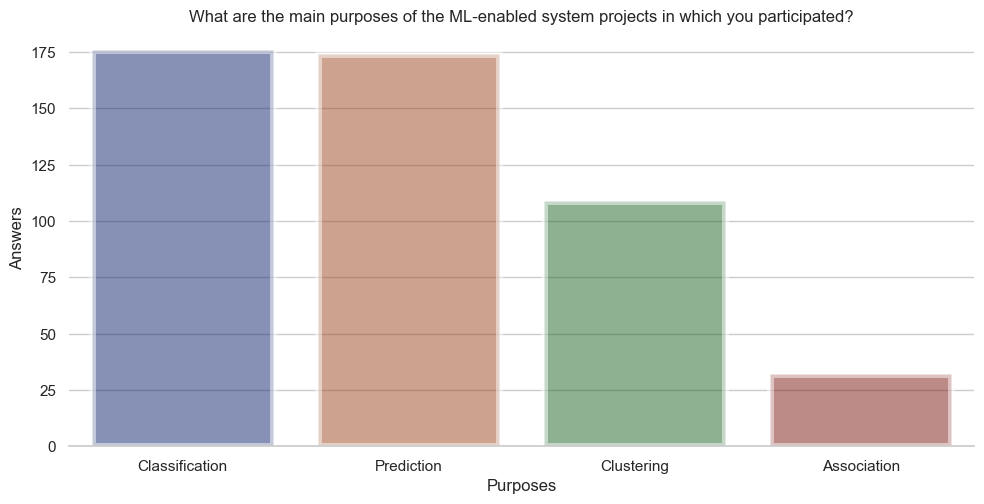

In [23]:
# we sort the dataframe to plot the bars decreasingly
single_barplot(d14_df.sort_values(by=['Answers'], ascending=False), "Main Purposes", "Answers", 
               title="What are the main purposes of the ML-enabled system projects in which you participated?",
               x_label="Purposes", y_label="Answers")

In [29]:
list(df['D14_ML_Purpose_Prediction_Others_Free'].unique())

['-99',
 'inbalanced dataset techniques',
 'Experimental designs, sampling methods to improve the test confiabilty, survival probabilities. ',
 'Denoising, Image Translation, Pose Estimation, Forecasting',
 nan,
 'Generation',
 'Computer Vision',
 'Object detection, Image Segmentation, Keypoint Estimation, Variational Auto Encoders',
 'Instance Segmentation, Human Pose Estimation',
 'Object detection for garbage identification',
 'interoperability between health information systems',
 'Anomaly detection',
 'Explainability enchancements ; Autoencoder problems for data compression ; Active Learning ; Meta learning ; Neural Architecture Search ',
 'object detection, segmentation',
 'Prescription',
 'segmentation',
 'Regression',
 'Pattern recognition in values of financial assets',
 'RFV for pre-paid telecommunication services',
 'Product Recommendation',
 'anomaly detection',
 'NLP',
 'Detecting possible fradulent phone calls performed by employees by using the silence information in cal

In [25]:
purpose_free = list(filter(lambda a: str(a) != '-99', list(df['D14_ML_Purpose_Prediction_Others_Free'])))
purpose_free = list(filter(lambda a: str(a) != 'nan', purpose_free))

In [26]:
purposes = format_wordcloud_text(purpose_free, True)

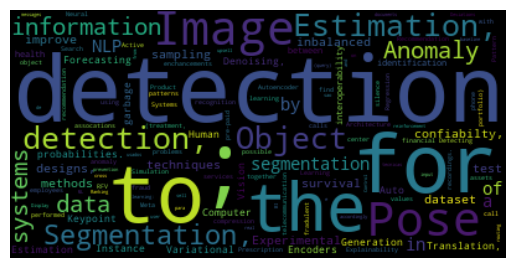

In [28]:
wordcloud(purposes)